<a href="https://colab.research.google.com/github/InesFaria-UM/DataScience4Covid19/blob/main/Covid19(X_ray).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import keras
from tensorflow.keras import layers, callbacks
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
from tensorflow.keras.layers import InputLayer
#import pandas_profiling

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d darshan1504/covid19-detection-xray-dataset

 90% 168M/186M [00:01<00:00, 161MB/s]
100% 186M/186M [00:01<00:00, 167MB/s]


In [5]:
ls

kaggle.json  NonAugmentedTrain/  TrainData/  ValData/


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: NonAugmentedTrain/BacterialPneumonia/164.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/165.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/166.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/167.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/168.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/169.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/17.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/170.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/171.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/172.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/173.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/174.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/175.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/176.jpeg  
  inflating: NonAugmentedTrain/BacterialPneumonia/177.jpeg  
  inflating: NonAugmentedTrain/Bact

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Kaggle/TrainData',
        target_size=(384, 384),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Kaggle/ValData',
        target_size=(384, 384),
        batch_size=32,
        class_mode='categorical')

Found 2023 images belonging to 4 classes.
Found 988 images belonging to 4 classes.


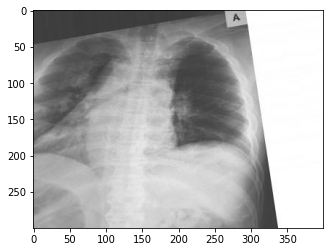

In [21]:
covid = cv2.imread("/content/gdrive/My Drive/Kaggle/TrainData/COVID-19/_0_1465610.jpeg")
viral = cv2.imread("/content/gdrive/My Drive/Kaggle/TrainData/ViralPneumonia/_0_9503218.jpeg")
Normal = cv2.imread("/content/gdrive/My Drive/Kaggle/TrainData/Normal/_0_6256933.jpeg")
bacterial = cv2.imread("/content/gdrive/My Drive/Kaggle/TrainData/BacterialPneumonia/_0_4754176.jpeg")
plt.imshow(covid)

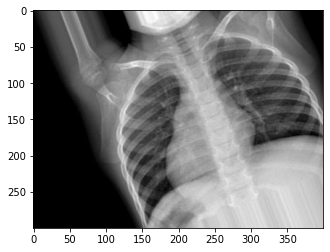

In [ ]:
plt.imshow(Normal)

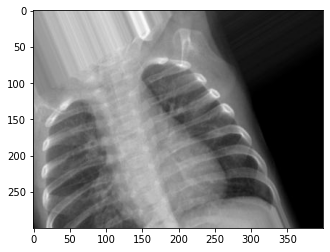

In [ ]:
plt.imshow(viral)

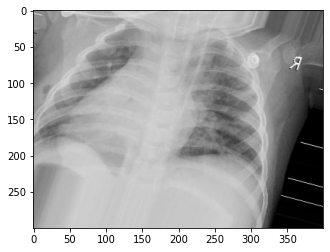

In [ ]:
plt.imshow(bacterial)

In [ ]:
model = Sequential()

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 20,  verbose = 1)

Epoch 1/20
64/64 [==============================] - 52s 805ms/step - loss: 72.7681 - accuracy: 0.3198 - val_loss: 1.1794 - val_accuracy: 0.5354
Epoch 2/20
64/64 [==============================] - 49s 767ms/step - loss: 1.6038 - accuracy: 0.4534 - val_loss: 1.6316 - val_accuracy: 0.5516
Epoch 3/20
64/64 [==============================] - 49s 767ms/step - loss: 1.3037 - accuracy: 0.5665 - val_loss: 0.8546 - val_accuracy: 0.6700
Epoch 4/20
64/64 [==============================] - 47s 742ms/step - loss: 0.8848 - accuracy: 0.6516 - val_loss: 0.9674 - val_accuracy: 0.6123
Epoch 5/20
64/64 [==============================] - 46s 729ms/step - loss: 0.8579 - accuracy: 0.6592 - val_loss: 0.8814 - val_accuracy: 0.6670
Epoch 6/20
64/64 [==============================] - 46s 720ms/step - loss: 0.8086 - accuracy: 0.6669 - val_loss: 1.0035 - val_accuracy: 0.6022
Epoch 7/20
64/64 [==============================] - 45s 712ms/step - loss: 0.8137 - accuracy: 0.6715 - val_loss: 7.5814 - val_accuracy: 0.456

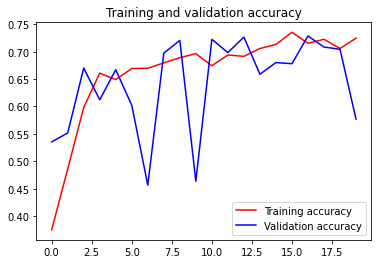

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model2 = Sequential()
# 1st Convolutional Layer
model2.add(Conv2D(filters=16, input_shape=(384,384,3), kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model2.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model2.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model2.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model2.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model2.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
# Max Pooling
model2.add(MaxPool2D(pool_size=(64,64), strides=(2,2), padding="valid"))
model2.add(MaxPool2D(pool_size=(32,32), strides=(2,2), padding="valid"))
model2.add(MaxPool2D(pool_size=(16,16), strides=(2,2), padding="valid"))
model2.add(MaxPool2D(pool_size=(8,8), strides=(2,2), padding="valid"))
model2.add(MaxPool2D(pool_size=(4,4), strides=(2,2), padding="valid"))
model2.add(Flatten())
model2.add(Dense(units = 288, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dropout(0.2, input_shape=(64,)))
model2.add(Dense(units = 32, activation = "relu"))
model2.add(Dense(units = 2, activation = "softmax"))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 384, 384, 16)      448       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 384, 384, 16)      2320      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 384, 384, 32)      4640      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 384, 384, 32)      9248      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 384, 384, 64)      18496     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 384, 384, 32)      18464     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 161, 161, 32)     

In [ ]:
model2 = Sequential()

# 1st Convolutional Layer
model2.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation = "relu"))
model2.add(Conv2D(32, (3,3), activation = "relu"))

# Max Pooling
model2.add(MaxPool2D(2,2))
model2.add(MaxPool2D(2,2))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(256, activation = "relu"))
model2.add(Dense(4, activation = "softmax"))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 220, 220, 32)      18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 96800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [ ]:
model2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 20,  verbose = 1)

Epoch 1/20
64/64 [==============================] - 54s 799ms/step - loss: 6.9322 - accuracy: 0.4383 - val_loss: 1.1789 - val_accuracy: 0.4474
Epoch 2/20
64/64 [==============================] - 49s 777ms/step - loss: 1.0612 - accuracy: 0.6306 - val_loss: 1.5501 - val_accuracy: 0.4119
Epoch 3/20
64/64 [==============================] - 50s 780ms/step - loss: 1.0088 - accuracy: 0.6255 - val_loss: 1.0407 - val_accuracy: 0.5628
Epoch 4/20
64/64 [==============================] - 49s 768ms/step - loss: 1.0849 - accuracy: 0.6625 - val_loss: 1.2536 - val_accuracy: 0.4737
Epoch 5/20
64/64 [==============================] - 49s 762ms/step - loss: 0.8722 - accuracy: 0.6546 - val_loss: 0.9868 - val_accuracy: 0.6032
Epoch 6/20
64/64 [==============================] - 49s 763ms/step - loss: 0.8247 - accuracy: 0.6848 - val_loss: 1.9530 - val_accuracy: 0.5071
Epoch 7/20
64/64 [==============================] - 48s 753ms/step - loss: 0.9315 - accuracy: 0.6531 - val_loss: 0.9676 - val_accuracy: 0.6316

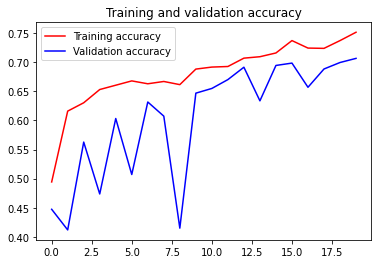

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model3 = Sequential()

# 1st Convolutional Layer
model3.add(Conv2D(32, (3,3), input_shape=(384,384,3), activation = "relu"))
model3.add(Conv2D(64, (3,3), activation = "relu"))
model3.add(Conv2D(64, (3,3), activation = "relu"))

# Max Pooling
model3.add(MaxPool2D(2,2))
model3.add(MaxPool2D(2,2))
model3.add(MaxPool2D(2,2))

model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(4, activation = "softmax"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 382, 382, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 380, 380, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 378, 378, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 141376)           

In [ ]:
model3.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40,  verbose = 1)

Epoch 1/40
64/64 [==============================] - 780s 12s/step - loss: 2.6359 - accuracy: 0.4027 - val_loss: 1.1513 - val_accuracy: 0.3897
Epoch 2/40
64/64 [==============================] - 97s 2s/step - loss: 1.0922 - accuracy: 0.5651 - val_loss: 1.1089 - val_accuracy: 0.3836
Epoch 3/40
64/64 [==============================] - 96s 2s/step - loss: 0.9364 - accuracy: 0.5852 - val_loss: 1.1721 - val_accuracy: 0.4798
Epoch 4/40
64/64 [==============================] - 96s 2s/step - loss: 0.8757 - accuracy: 0.6302 - val_loss: 1.0410 - val_accuracy: 0.5354
Epoch 5/40
64/64 [==============================] - 96s 2s/step - loss: 0.8508 - accuracy: 0.6538 - val_loss: 1.0934 - val_accuracy: 0.5040
Epoch 6/40
64/64 [==============================] - 96s 2s/step - loss: 0.7889 - accuracy: 0.6803 - val_loss: 0.8692 - val_accuracy: 0.6457
Epoch 7/40
64/64 [==============================] - 96s 2s/step - loss: 0.8560 - accuracy: 0.6868 - val_loss: 1.0259 - val_accuracy: 0.5597
Epoch 8/40
64/64 [

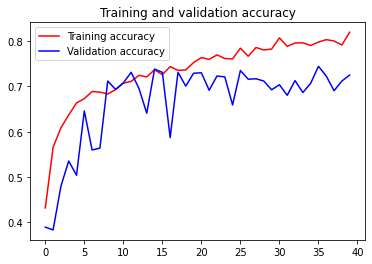

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [24]:
model4 = Sequential()

model4.add(Conv2D(16, (3,3), input_shape=(384,384,3), activation = "relu"))
model4.add(Conv2D(32, (3,3), activation = "relu"))
model4.add(Conv2D(64, (3,3), activation = "relu"))

model4.add(MaxPool2D(2,2))
model4.add(MaxPool2D(2,2))
model4.add(MaxPool2D(2,2))

model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(64, activation = "relu"))
model4.add(Dense(4, activation = "softmax"))
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 382, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 380, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 378, 378, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0

In [25]:
model4.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
history4 = model4.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40,  verbose = 1)

Epoch 1/40
64/64 [==============================] - 590s 9s/step - loss: 3.5329 - accuracy: 0.3560 - val_loss: 1.2890 - val_accuracy: 0.3593
Epoch 2/40
64/64 [==============================] - 94s 1s/step - loss: 1.0783 - accuracy: 0.5302 - val_loss: 1.0023 - val_accuracy: 0.5800
Epoch 3/40
64/64 [==============================] - 91s 1s/step - loss: 0.8903 - accuracy: 0.6356 - val_loss: 1.0541 - val_accuracy: 0.5415
Epoch 4/40
64/64 [==============================] - 89s 1s/step - loss: 0.8661 - accuracy: 0.6569 - val_loss: 1.0150 - val_accuracy: 0.5769
Epoch 5/40
64/64 [==============================] - 89s 1s/step - loss: 0.8035 - accuracy: 0.6764 - val_loss: 0.8627 - val_accuracy: 0.6781
Epoch 6/40
64/64 [==============================] - 88s 1s/step - loss: 0.8884 - accuracy: 0.6547 - val_loss: 0.9594 - val_accuracy: 0.5972
Epoch 7/40
64/64 [==============================] - 87s 1s/step - loss: 0.7357 - accuracy: 0.7064 - val_loss: 0.9274 - val_accuracy: 0.5901
Epoch 8/40
64/64 [=

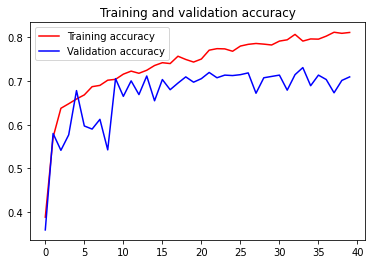

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [28]:
model5 = Sequential()

model5.add(Conv2D(16, (3,3), input_shape=(384,384,3), activation = "relu"))
model5.add(Conv2D(32, (3,3), activation = "relu"))
model5.add(Conv2D(64, (3,3), activation = "relu"))

model5.add(MaxPool2D(2,2))
model5.add(MaxPool2D(2,2))
model5.add(MaxPool2D(2,2))

model5.add(Flatten())
model5.add(Dropout(0.5))
model5.add(Dense(250, activation = "relu"))
model5.add(Dense(4, activation = "softmax"))
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 382, 382, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 380, 380, 32)      4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 378, 378, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 141376)           

In [29]:
model5.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
history5 = model5.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40,  verbose = 1)

Epoch 1/40
64/64 [==============================] - 97s 2s/step - loss: 3.5203 - accuracy: 0.4140 - val_loss: 1.1398 - val_accuracy: 0.3016
Epoch 2/40
64/64 [==============================] - 95s 1s/step - loss: 1.0037 - accuracy: 0.5740 - val_loss: 0.9410 - val_accuracy: 0.5749
Epoch 3/40
64/64 [==============================] - 94s 1s/step - loss: 0.9104 - accuracy: 0.6300 - val_loss: 0.9559 - val_accuracy: 0.5658
Epoch 4/40
64/64 [==============================] - 93s 1s/step - loss: 0.8285 - accuracy: 0.6775 - val_loss: 1.1273 - val_accuracy: 0.5132
Epoch 5/40
64/64 [==============================] - 94s 1s/step - loss: 0.7658 - accuracy: 0.6998 - val_loss: 0.7778 - val_accuracy: 0.6812
Epoch 6/40
64/64 [==============================] - 94s 1s/step - loss: 0.7642 - accuracy: 0.6857 - val_loss: 1.1573 - val_accuracy: 0.5223
Epoch 7/40
64/64 [==============================] - 93s 1s/step - loss: 0.7917 - accuracy: 0.6873 - val_loss: 0.7713 - val_accuracy: 0.6883
Epoch 8/40
64/64 [==

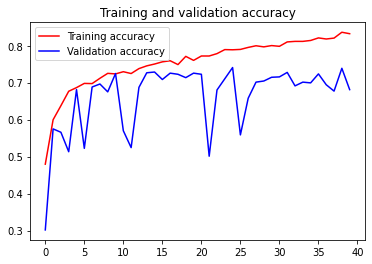

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

MODELO COM EARLY STOPPING

In [10]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [11]:
model6 = Sequential()

model6.add(Conv2D(16, (3,3), input_shape=(384,384,3), activation = "relu"))
model6.add(Conv2D(32, (3,3), activation = "relu"))
model6.add(Conv2D(64, (3,3), activation = "relu"))

model6.add(MaxPool2D(2,2))
model6.add(MaxPool2D(2,2))
model6.add(MaxPool2D(2,2))

model6.add(Flatten())
model6.add(Dropout(0.5))
model6.add(Dense(250, activation = "relu"))
model6.add(Dense(4, activation = "softmax"))
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 382, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 380, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 378, 378, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0

In [12]:
model6.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [13]:
history6 = model6.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40, callbacks=[early_stopping], verbose = 1) 

Epoch 1/40
64/64 [==============================] - 780s 12s/step - loss: 5.0740 - accuracy: 0.3706 - val_loss: 1.1569 - val_accuracy: 0.4251
Epoch 2/40
64/64 [==============================] - 86s 1s/step - loss: 0.9573 - accuracy: 0.6236 - val_loss: 1.5544 - val_accuracy: 0.3735
Epoch 3/40
64/64 [==============================] - 85s 1s/step - loss: 0.9198 - accuracy: 0.6232 - val_loss: 1.0141 - val_accuracy: 0.5192
Epoch 4/40
64/64 [==============================] - 85s 1s/step - loss: 0.8218 - accuracy: 0.6738 - val_loss: 1.0156 - val_accuracy: 0.5364
Epoch 5/40
64/64 [==============================] - 85s 1s/step - loss: 0.7915 - accuracy: 0.6800 - val_loss: 0.8761 - val_accuracy: 0.6377
Epoch 6/40
64/64 [==============================] - 85s 1s/step - loss: 0.7686 - accuracy: 0.6962 - val_loss: 1.1580 - val_accuracy: 0.5182
Epoch 7/40
64/64 [==============================] - 85s 1s/step - loss: 0.7569 - accuracy: 0.7110 - val_loss: 0.9512 - val_accuracy: 0.5526
Epoch 8/40
64/64 [

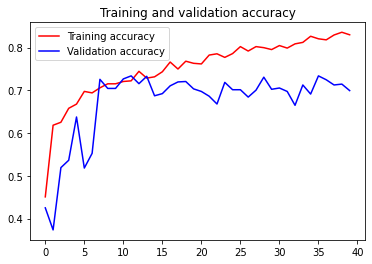

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [15]:
model7 = Sequential()

model7.add(Conv2D(16, (3,3), input_shape=(384,384,3), activation = "relu",  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model7.add(Conv2D(32, (3,3), activation = "relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model7.add(Conv2D(64, (3,3), activation = "relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model7.add(MaxPool2D(2,2))
model7.add(MaxPool2D(2,2))
model7.add(MaxPool2D(2,2))

model7.add(Flatten())
model7.add(Dropout(0.5))
model7.add(Dense(64, activation = "relu"))
model7.add(Dense(4, activation = "softmax"))
model7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 382, 382, 16)      448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 380, 380, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 378, 378, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)           

In [16]:
model7.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
history7 = model7.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40, verbose = 1) 

Epoch 1/40
64/64 [==============================] - 800s 12s/step - loss: 7.2193 - accuracy: 0.4544 - val_loss: 1.7263 - val_accuracy: 0.5385
Epoch 2/40
64/64 [==============================] - 85s 1s/step - loss: 1.4760 - accuracy: 0.5748 - val_loss: 1.2225 - val_accuracy: 0.5941
Epoch 3/40
64/64 [==============================] - 85s 1s/step - loss: 1.2031 - accuracy: 0.6108 - val_loss: 1.2826 - val_accuracy: 0.4980
Epoch 4/40
64/64 [==============================] - 85s 1s/step - loss: 1.1469 - accuracy: 0.6394 - val_loss: 1.0656 - val_accuracy: 0.6154
Epoch 5/40
64/64 [==============================] - 85s 1s/step - loss: 1.0520 - accuracy: 0.6516 - val_loss: 1.2469 - val_accuracy: 0.5182
Epoch 6/40
64/64 [==============================] - 84s 1s/step - loss: 1.1270 - accuracy: 0.6532 - val_loss: 1.0742 - val_accuracy: 0.6053
Epoch 7/40
64/64 [==============================] - 84s 1s/step - loss: 0.9196 - accuracy: 0.6632 - val_loss: 0.9529 - val_accuracy: 0.6933
Epoch 8/40
64/64 [

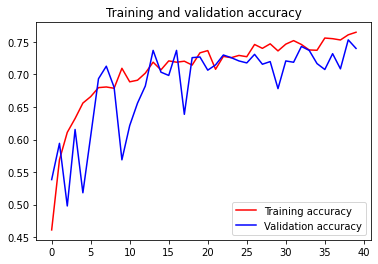

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [20]:
model8 = Sequential()

model8.add(Conv2D(16, (3,3), input_shape=(384,384,3), activation = "relu",  kernel_regularizer=l2(0.001)))
model8.add(Conv2D(32, (3,3), activation = "relu", kernel_regularizer=l2(0.001)))
model8.add(Conv2D(64, (3,3), activation = "relu", kernel_regularizer=l2(0.001)))

model8.add(MaxPool2D(2,2))
model8.add(MaxPool2D(2,2))
model8.add(MaxPool2D(2,2))

model8.add(Flatten())
model8.add(Dropout(0.5))
model8.add(Dense(64, activation = "relu"))
model8.add(Dense(4, activation = "softmax"))
model8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 382, 382, 16)      448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 380, 380, 32)      4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 378, 378, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 141376)           

In [21]:
model8.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
history8 = model8.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40, verbose = 1) 

Epoch 1/40
64/64 [==============================] - 86s 1s/step - loss: 1.9641 - accuracy: 0.4414 - val_loss: 1.2814 - val_accuracy: 0.3583
Epoch 2/40
64/64 [==============================] - 84s 1s/step - loss: 0.9796 - accuracy: 0.6361 - val_loss: 0.9326 - val_accuracy: 0.6771
Epoch 3/40
64/64 [==============================] - 84s 1s/step - loss: 0.8948 - accuracy: 0.6530 - val_loss: 1.1458 - val_accuracy: 0.4767
Epoch 4/40
64/64 [==============================] - 85s 1s/step - loss: 0.8802 - accuracy: 0.6616 - val_loss: 0.9127 - val_accuracy: 0.5972
Epoch 5/40
64/64 [==============================] - 84s 1s/step - loss: 0.8375 - accuracy: 0.6866 - val_loss: 0.8628 - val_accuracy: 0.6690
Epoch 6/40
64/64 [==============================] - 84s 1s/step - loss: 0.7787 - accuracy: 0.6795 - val_loss: 0.8003 - val_accuracy: 0.6822
Epoch 7/40
64/64 [==============================] - 84s 1s/step - loss: 0.7838 - accuracy: 0.6901 - val_loss: 0.8163 - val_accuracy: 0.6913
Epoch 8/40
64/64 [==

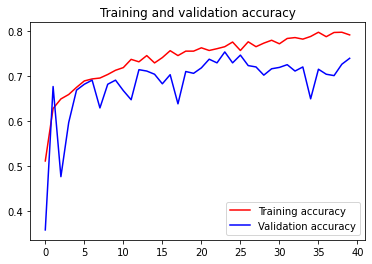

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Modelo com early stopping e regularização

In [9]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [10]:
model9 = Sequential()

model9.add(Conv2D(16, (3,3), input_shape=(384,384,3), activation = "relu",  kernel_regularizer=l2(0.001)))
model9.add(Conv2D(32, (3,3), activation = "relu", kernel_regularizer=l2(0.001)))
model9.add(Conv2D(64, (3,3), activation = "relu", kernel_regularizer=l2(0.001)))

model9.add(MaxPool2D(2,2))
model9.add(MaxPool2D(2,2))
model9.add(MaxPool2D(2,2))

model9.add(Flatten())
model9.add(Dropout(0.5))
model9.add(Dense(64, activation = "relu"))
model9.add(Dense(4, activation = "softmax"))
model9.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 382, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 380, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 378, 378, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 189, 189, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0

In [11]:
model9.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [13]:
history9 = model9.fit(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40, callbacks=[early_stopping], verbose = 1) 

Epoch 1/40
64/64 [==============================] - 87s 1s/step - loss: 0.7063 - accuracy: 0.7153 - val_loss: 0.7773 - val_accuracy: 0.7217
Epoch 2/40
64/64 [==============================] - 86s 1s/step - loss: 0.7491 - accuracy: 0.7296 - val_loss: 0.7646 - val_accuracy: 0.7176
Epoch 3/40
64/64 [==============================] - 87s 1s/step - loss: 0.6796 - accuracy: 0.7321 - val_loss: 0.8355 - val_accuracy: 0.6397
Epoch 4/40
64/64 [==============================] - 86s 1s/step - loss: 0.6682 - accuracy: 0.7266 - val_loss: 0.8412 - val_accuracy: 0.7338
Epoch 5/40
64/64 [==============================] - 87s 1s/step - loss: 0.6684 - accuracy: 0.7435 - val_loss: 0.9917 - val_accuracy: 0.5344
Epoch 6/40
64/64 [==============================] - 87s 1s/step - loss: 0.6454 - accuracy: 0.7370 - val_loss: 0.7587 - val_accuracy: 0.6994
Epoch 7/40
64/64 [==============================] - 87s 1s/step - loss: 0.7161 - accuracy: 0.7523 - val_loss: 0.7461 - val_accuracy: 0.7510
Epoch 8/40
64/64 [==

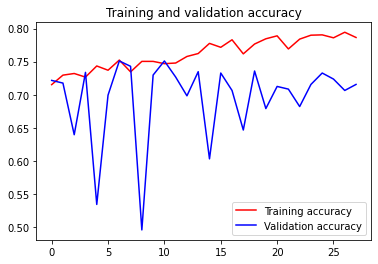

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']
loss = history9.history['loss']
val_loss = history9.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()